

# Project 2 : Investigate a No-show appointments Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


>
>No-show appointments Dataset contains information of 100k medical appointments collected in Brazil, and it has been published by Kaggle as an open dataset. Some characteristics of the patient are included in each row to help with investigating and finding helpful findings.
>
>Below are the questions that can be helpful to guide me to investigate the dataset :
>
>Is sending messages to the patient considered an effective way to remind patients of their appointments? 
>
>Does the duration between registering the appointment and the appointment day proportional to the possibility of missing an appointment?
>

In [1]:
# import statements for all of the packages that I plan to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Load the data and print out a few lines of the dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#inspect data by performing some operation 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
#get some information about the dataset before starting to analyze it
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


(110527, 14)

The information above shows that there are inappropriate data types for some of the variables, such as ScheduledDay and AppointmentDay.
The data types of ScheduledDay and AppointmentDay needs to be converted to DateTime type to perform some of the operations on it in an easy way.

In [5]:
# Check for missing data to clean the dataset
df.isnull().sum()
# As shown below, there's no missing value

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
# Check for duplicate data to clean the dataset
df.duplicated().sum()

0

In [7]:
#Check the uniqueness of the AppointmentID values since it's the only variable that must be unique
df.AppointmentID.nunique()

110527

The number of unique values is equal to the number of entries(110527) that we extracted before, and that reflects the uniqueness of all appointments.

In [10]:
#check if all scheduled appointments dates are before the date of the appointment
#we have to run the next cell that converts Strings to Datetime for ScheduledDay and AppointmentDay(on the data cleaning section) to get the results
rslt = df.loc[df['ScheduledDay'].dt.date > df['AppointmentDay'].dt.date] 
rslt

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes


The results above show that some of the rows have an appointment day before the scheduled day as if the patient scheduled an appointment after attending it, which is unreasonable.
We have to drop these rows to clean the dataset.

After checking the cleanliness of data, we noticed that there's no duplication in data or missing values. And all we have to do to prepare the data is changing inappropriate data types to manipulate the dataset easily, dropping the rows that have negative values of ages, and dropping the rows which have scheduled date after the appointment date.


### Data Cleaning 

As I mentioned in the previous section, the dataset is overall clean, but it needs some enhancements to make the data easier to manipulate. Some of notes that we noticed after inspecting the dataset :

- Datatypes need to be changed for some of the variables, such as ScheduledDay, AppointmentDay, and No-show.

- When we inspected the data using describe() function, we noticed a negative value as a minimum value for the age variable, and since that is not an acceptable value for age,  we'll drop the rows with negative values.

- some of the rows have an appointment day before the scheduled day, and they need to be dropped.

In [9]:
#convert Strings to Datetime for ScheduledDay and AppointmentDay
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'])

#prove the change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [11]:
#retrieve the rows with negative values
rslt_df = df.loc[df['Age'] < 0] 
rslt_df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [12]:
#drop the row with negative value (-1)
df.drop(99832, inplace = True) 

#prove the change of min value 
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [13]:
#drop the rows which the scheduled date is after the appointment date.
rslt_df = df.loc[df['ScheduledDay'].dt.date > df['AppointmentDay'].dt.date] 
rslt_df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes


In [14]:
df.drop([27033,55226,64175,71533,72362], inplace = True)


In [15]:
df.shape

(110521, 14)

<a id='eda'></a>
## Exploratory Data Analysis



### Research Q1 : Is sending messages to the patient considered an effective way to remind patients of their appointments? 

In [16]:
#get total counts for patients who show-up or didn't
counts= df['No-show'].value_counts()
counts

No     88207
Yes    22314
Name: No-show, dtype: int64

On the next cell, we will Plot a chart to illustrate the percentage of attended or not appointments (whether or not patients show up for their appointment) by using Matplotlib to visualize the data.
After that, we will find the relationship between receiving a message and attending the appointment (SMS_received and No-show variables).  

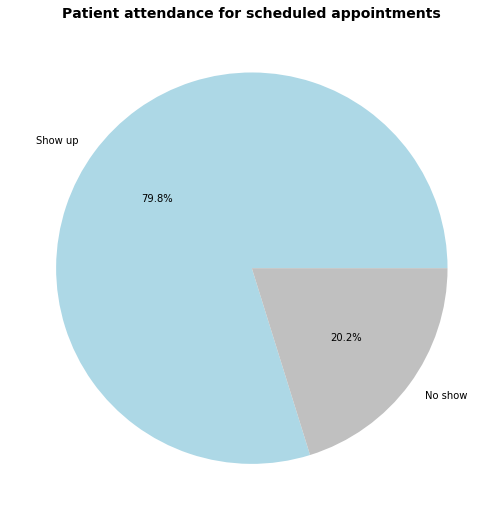

In [17]:
#plot a chart to illustrate the percentage of attended or not appointments
show_up=counts['No']
no_show=counts['Yes']
data = [show_up,no_show]
labels = 'Show up','No show'
colors = ['lightblue','silver']
plt.figure(figsize=(9,9))

plt.pie(data,labels=labels,autopct='%1.1f%%',colors=colors)
plt.title('Patient attendance for scheduled appointments',fontsize=14, fontweight='bold')

plt.show()


In [18]:
#group the dataframe by'SMS_received' and 'No-show'
received_sms_df= df.groupby(['SMS_received','No-show']).count()['AppointmentID']
received_sms_df

SMS_received  No-show
0             No         62509
              Yes        12530
1             No         25698
              Yes         9784
Name: AppointmentID, dtype: int64

In [19]:
#percentage of show up for a patient who received SMS 
show_percentage1=(received_sms_df[1]['No']/(received_sms_df[1]['Yes']+received_sms_df[1]['No']))*100

#percentage of show up for a patient who didn't receive SMS 
show_percentage2=(received_sms_df[0]['No']/(received_sms_df[0]['Yes']+received_sms_df[0]['No']))*100


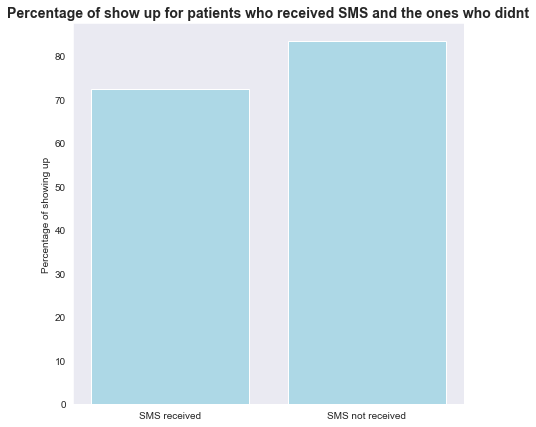

In [20]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [show_percentage1, show_percentage2]
labels = ['SMS received', 'SMS not received']
sns.set_style("dark")
plt.figure(figsize=(7,7))
plt.bar(locations, heights, tick_label=labels,color='lightblue')
plt.title('Percentage of show up for patients who received SMS and the ones who didn''t',fontsize=14, fontweight='bold')
plt.ylabel('Percentage of showing up');
plt.show()


The figure above illustrates the percentages of showing up for patients who receive SMS and the ones who don't. It shows that the patients who receive an SMS attend their appointment with a percentage of 72%, while the patients who don't receive an SMS attend with a percentage of 83%, so, sending an SMS doesn't affect the patients' attendance.

### Research Q2 : Does the duration between scheduling the appointment and the appointment day proportional to the possibility of missing an appointment?

In [21]:
#insert a duration column for the duration between scheduling the appointment and the appointment day
df['Duration']=df['AppointmentDay'].dt.date-df['ScheduledDay'].dt.date
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Duration
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,35 days
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,35 days
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,41 days
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,41 days


In [22]:
df['Duration'].describe()

count                     110521
mean     10 days 04:25:27.412889
std      15 days 06:07:25.262183
min              0 days 00:00:00
25%              0 days 00:00:00
50%              4 days 00:00:00
75%             15 days 00:00:00
max            179 days 00:00:00
Name: Duration, dtype: object

In [23]:
#group the dataframe by the duration and No-show variables
duration_df=df.groupby(['Duration','No-show']).count()['AppointmentID']
duration_df

Duration  No-show
0 days    No         36770
          Yes         1792
1 days    No          4100
          Yes         1113
2 days    No          5123
                     ...  
169 days  Yes            1
176 days  No            10
          Yes            6
179 days  No             8
          Yes            2
Name: AppointmentID, Length: 235, dtype: int64

In [24]:
#ignore the index to access the dataframe rows easier
duration_df=df.groupby(['Duration','No-show'],as_index=False)['AppointmentID'].count()
duration_df

,Duration,No-show,AppointmentID
0,0 days,No,36770
1,0 days,Yes,1792
2,1 days,No,4100
3,1 days,Yes,1113
4,2 days,No,5123
...,...,...,...
230,169 days,Yes,1
231,176 days,No,10
232,176 days,Yes,6
233,179 days,No,8


In [25]:
#create an empty dic to insert a percentage of no show for each duration
no_show_rate={}
for x in range(len(duration_df.index)):
    if duration_df.loc[x]['No-show']=='Yes':
        if duration_df.loc[x]['Duration']==duration_df.loc[x-1]['Duration']:
            rate=(duration_df.loc[x]['AppointmentID']/(duration_df.loc[x-1]['AppointmentID']+duration_df.loc[x]['AppointmentID']))*100
            no_show_rate[duration_df.loc[x]['Duration'].days]=rate
        else:
            no_show_rate[duration_df.loc[x]['Duration'].days]=100
no_show_rate    

{0: 4.647061874384108,
 1: 21.350469978898907,
 2: 23.82156133828996,
 3: 23.52941176470588,
 4: 23.270321361058603,
 5: 26.609703997558743,
 6: 24.795640326975477,
 7: 26.681614349775785,
 8: 28.730703259005146,
 9: 27.41433021806853,
 10: 31.63191948238677,
 11: 31.61094224924012,
 12: 31.659192825112108,
 13: 31.866825208085615,
 14: 31.342258839684174,
 15: 33.39986693280107,
 16: 30.49522154648132,
 17: 31.616982836495033,
 18: 30.558276199804112,
 19: 34.770114942528735,
 20: 34.372367312552655,
 21: 30.897367006985494,
 22: 34.44160272804774,
 23: 33.57664233576642,
 24: 37.78135048231511,
 25: 40.1883830455259,
 26: 35.9781121751026,
 27: 31.589338598223097,
 28: 29.484173505275496,
 29: 32.69054178145087,
 30: 26.5625,
 31: 32.73809523809524,
 32: 35.153583617747444,
 33: 33.433734939759034,
 34: 33.415841584158414,
 35: 37.279335410176536,
 36: 31.03448275862069,
 37: 35.95166163141994,
 38: 34.17085427135678,
 39: 32.35294117647059,
 40: 40.55118110236221,
 41: 35.3801169590

In [26]:
#create a new dataframe from no_show_rate dictionary to plot the chart with this dataframe
new_df=pd.DataFrame.from_dict(no_show_rate,orient='index').reset_index()
new_df.columns = ['Duration', 'No-show Percentage']
new_df

,Duration,No-show Percentage
0,0,4.647062
1,1,21.350470
2,2,23.821561
3,3,23.529412
4,4,23.270321
...,...,...
106,155,60.000000
107,162,18.181818
108,169,12.500000
109,176,37.500000


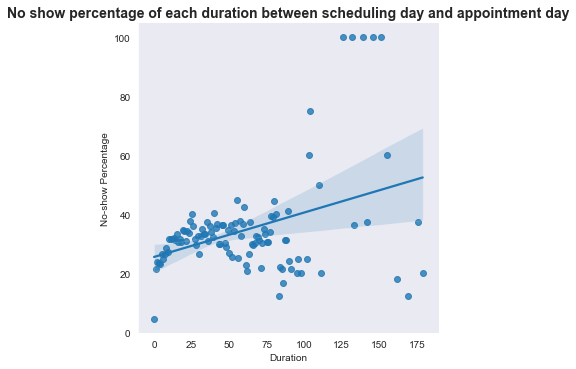

In [27]:
#scatter plot a to illustrates the relationship between the duration(from scheduling day to appointment day) and no show
#use sns to draw the best fit line
sns.lmplot(x='Duration', y='No-show Percentage', data=new_df)
plt.title('No show percentage of each duration between scheduling day and appointment day',fontsize=14, fontweight='bold')
plt.show()


Above is a scatter plot with the best fit line, which illustrates the proportional relationship between patients' no show and the duration from scheduling an appointment to the appointment day.
When the duration increases, the percentage of not showing increases as well.

<a id='conclusions'></a>
## Conclusions




After analyzing,exploring, and visualizing the data in the previous sections, we will summerize the findings that we've detected.
The first question was finding if sending messages to the patient considered an effective way to remind patients of their appointments.  From the results that we got, we find out that receiving an SMS doesn't affect the patients' appointments attendance, since the percentage of the patients who didn't get an SMS and show up is higher than the patients who received an SMS and attended.

The second question was if the duration between scheduling the appointment and the appointment day proportional to the possibility of missing an appointment. We figured out that as the duration increase, the possibility of no-show increase as well.

In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_no_show_appointments_dataset_project2.ipynb'])

0